<a href="https://colab.research.google.com/github/maritnorli/PyTorch-course/blob/main/01_pytorch_workflow_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch Workflow

Explore Pytorch end to end workflow
* Ground truth notebook
*Book version of notebook
*ask question

In [24]:
what_were_covering = {1: "data (prepare and load)",
                      2: "build model",
                      3: "fitting the model to data (training)",
                      4: "making predictions and evaluating a model (inference)",
                      5: "saving and loading a model",
                      6: "putting it all together"}

what_were_covering


{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making predictions and evaluating a model (inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [25]:
import torch
from torch import nn # nn contains all of pytorches buildingblocks for neural networks
import matplotlib.pyplot as plt

#Check pytorch version
torch.__version__

'2.1.0+cu121'

## 1. Data (preparing and loading)

Data can be almost anything

Excel
Images
Videos
Audio
DNA
Text

Machine learning is a game of two parts:
1. Get data numerical representation
2. Build a model to learn pattern in the numerical representation

To show this, create some **known** data from a linear regression formula Y = a + bX
We'll use a linear regression formula to make a straight line with known **parameter**

In [26]:
# Create *known parameters
weight = 0.7 # b
bias = 0.3 # a
# Create
start = 0
end= 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y= weight * X + bias

X[:10], y[:10], len(X), len(y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

In [27]:
len(X), len(y)

(50, 50)

### Split data into training and test sets (on of the most important concepts in machine learning in general)
1. training 60-80% of data
2. validation 10-20%
3. test 10-20%

Lets create a training and test data set


In [28]:
# Create a train/test split
train_split = int(0.8 * len(X))
X_train, y_train =X[:train_split], y[:train_split] #use indexing to get all data up until the train split [:train_split]

X_test, y_test = X[train_split:], y[train_split:] #use indexing to get all data aftrer the train split [train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)





(40, 40, 10, 10)

## How might we bettr visualize data?


In [29]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compare predictions
  """
  plt.figure(figsize=(10, 7))

  #Plot triang in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  #Are there predictions?
  if predictions is not None:
    # plot if exist
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  #Show the legend
  plt.legend(prop={"size": 14});


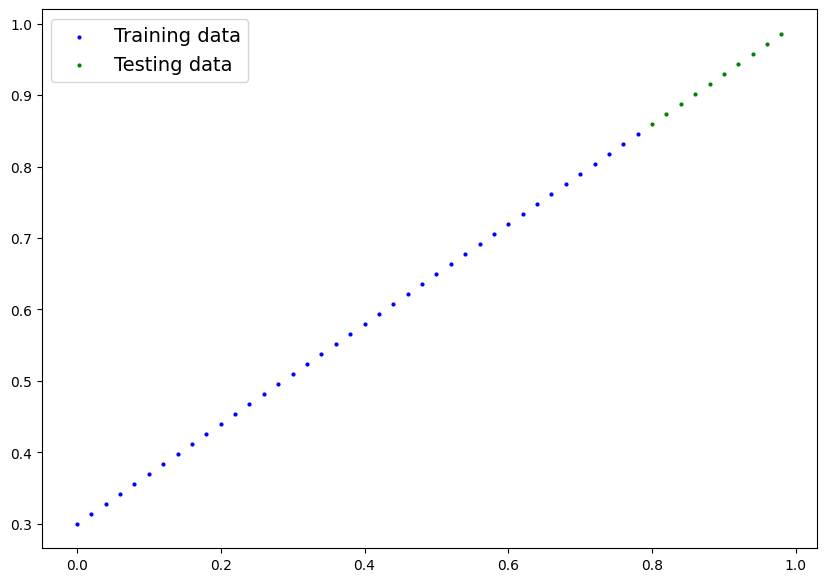

In [30]:
plot_predictions()

### 2. Build model
Our first PyTorch model!
* Check out: Real python classes OOP in Python

What our model does:
* Start with random values (weight & bias
* Look at data and adjust the ransom values to better represent (or get closer to) the ideal values (the weigth & bias value we used to create the data

How does it do so?

Through 2 main algorithms:
* 1. Gradient descent
* 2. Backpropagation

## Check out 3Blue1Brown on neural networks on youtube. about gradient descent and backpropagation

In [31]:
import torch
from torch import nn


# SHIFT + TAB OF MARKED LINES DECREASE INDENTATION BY ONE FOR ALL OF THE MARKED LINES

In [32]:
# Create linear reg model class
# the class inherits from nn.Module, almost everything in pytorch
# inherits from nn.Module. Like lego bricks
# Parameter: tensor is a module parameter
# requires_grad = if requires gradient
# torch float is default float 32
# Whenever inheriting from nn.module one MUST owerwrite the forward function

class LinearRegressionModel(nn.Module):
  def __init__(self): #OBS mellomrom etter def
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))

  # Forward method to define the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor: # x is the input data
    return self.weights * x + self.bias # this is the lin reg formula


### Pytorch model building essentials

* torch.nn - contains all of the building blocks for computational graphs( a neural network is a graph )
* torch.nn.Parameter - what parameters should our model try an learn, often a pytorch layer from torch.nn will set these for us
* torch.nn.Module - the base class for all neural network modules, if you subclass it you should owerwrite forward
* torch.optim - this is where the optimizers in python lives. an optimizer contains algorithms that will optimize random values to better represent data.
    They will help with gradien descent.
* def forward() - All nn.Module subclasses require you to owerwrite forward(), this method defines what happens in the forward computation
* dataset - for bigger sets of data
* dataloader -  for bigger sets of data

*pytorch cheat cheat




In [33]:
torch.randn(1) # gets random number every time

tensor([0.3367])

In [34]:
torch.manual_seed(42) # with seed gets same random number every time
torch.randn(1)

tensor([0.3367])

### Checking the contents of our pytorch model

Now we crated a model lets see whats inside

So we can chec our model parameters or what inside it with .parameters


In [35]:
# create random seed
torch.manual_seed(42)

#create an intance of the model (this is a subclass of nn.Module)
model_0 = LinearRegressionModel()

# Check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [36]:
# List name parameters (fasit: weight=0.7, bias=0.3, our deep learning should with further code edit the values below to these!)
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Making predictions using `torch.inference_mode()`

To test our models predictive power, lets see how well it predicts `y_test` based on `x_test?

When we pass data thorugh our model its goin to run it through the forward method.



In [37]:
X_test, y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [38]:
# Make predictions with model
with torch.inference_mode():
  y_preds = model_0(X_test) #passing our X_test data through our model

## You can also (often in older code), instead of inference_mode, use torch.no_grad(), but inference is preferred
#with torch.no_grad():
#  y_preds = model_0(X_test)


y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [39]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

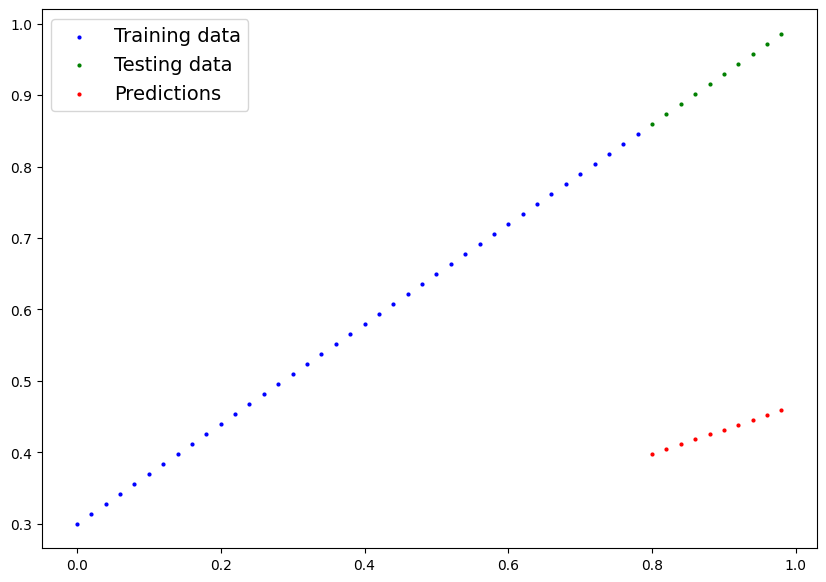

In [40]:
plot_predictions(predictions=y_preds)
# Since model was initialized with random numbers the predictions are quite far off.


## 3. Train model

The whole idea of training is for a model to move from some unknown parameters, these may be random, to som e known parameters
Or in other words from a poor representation of the data to a better represtentation of the data.

One way to measure how poor or wrong your models predictions are is to use a **loss function** (criterion, cost function are other words for it)

Thing we need to train:

* **Loss function:** A function to measure how wrong your models predictions are to the ideal outputs, lower is better
* **Optimizer:** Takes into account the loss of a model and adjusts the models parameters (eg weight and bias) to improve the loss function

And spesifically for pytorch we need
* A training loop
* A testing loop

(We "measure" the distance between the red dots and the green dots. Less distance is better


In [41]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [42]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

## **learning rate** 0.1 will change tensor value 0.3367 on the 0.1 place so the "3", if 0.001 it will change the "6"

In [43]:
# Setup a loss function
loss_fn = nn.L1Loss()

# setup an optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01) # lr= learning rate = possibly the most important hyperparameter you can set


## CHOOSING LOSS FUNCTION
regression problem nn.L1Loss() is great,
**classifying images: nn.BCELoss()**


### Building a training loop in PYTorch a(and a testing loop)

A couple of things we need in a training loop:
0. Loop through the data
1. Forward pass (this involves data moving through our models `forward()` functions
2. Calc the loss (compare forward pass predictions to ground truth labels
3. Optimizer zero grad
4. Loss backward - move backwards through the network to calc the gradient of each of the parameters of our model with respect to the loss
5. Optimizer step - use the optimizer to adjust our models parameters to try and improve the loss



In [44]:
# An epoch is one loop through the data...
torch.manual_seed(42)
epochs = 100 # Epoch is the number of times to do the loop
# Create empty lists to store model progress

epoch_count = []
train_loss_values = []
test_loss_values = []

### Training
# 0. Loop through the data
for epoch in range(epochs):
  # Set the model to training mode
  model_0.train() #train mode in pytorch sets all parameters that require gradients to require gradients (minimize gradients to 0)

  # 1. Forward pass
  y_pred = model_0(X_train) # Pass the data through the model, this will perform the forward()

  # 2. Calculate the loss
  loss_values = loss_fn(y_pred, y_train) #(input, target) How wrong the predictions are comparing the training data to the model and makeing training labels

  #print(f"Loss: {loss}")
  #. Optimizer zero grad
  optimizer.zero_grad() # they accumulate every epoch, zero them to start fresh each forward pass)

  # 4. Perform back propagation on the loss with respect to the parameters of the model
  loss_values.backward()

  # 5. Step the optimizer (perform gradient descent)
  optimizer.step() #by default how the the optimizer changes will accumulate throught the loop... we have to zero them above in step 3 first

  ### Testing
  model_0.eval() # turns off different settings (drop out, batchNorm), in the model not needed for evaluation/tracking

  with torch.inference_mode(): # turns off gradient tracking ++ behind the scenes not needed for testing
  #with torch.no_grad(): You may also see this in older code
    # 1. Do the forward pass
    test_pred = model_0(X_test)

    # 2. Calculate the loss
    test_loss = loss_fn(test_pred, y_test)

  #Print whats happening
  if epoch % 10 == 0:
    epoch_count.append(epoch)
    train_loss_values.append(loss_values)
    test_loss_values.append(test_loss)
    print(f"Epoch: {epoch} | MAE train loss: {loss} | MAE test loss: {test_loss}")

    # Print out model state_dict()
    print(f"State_dict(): {model_0.state_dict()}")


Epoch: 0 | MAE train loss: 0.010256479494273663 | MAE test loss: 0.48106518387794495
State_dict(): OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch: 10 | MAE train loss: 0.010256479494273663 | MAE test loss: 0.3463551998138428
State_dict(): OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch: 20 | MAE train loss: 0.010256479494273663 | MAE test loss: 0.21729660034179688
State_dict(): OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch: 30 | MAE train loss: 0.010256479494273663 | MAE test loss: 0.14464017748832703
State_dict(): OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
Epoch: 40 | MAE train loss: 0.010256479494273663 | MAE test loss: 0.11360953003168106
State_dict(): OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epoch: 50 | MAE train loss: 0.010256479494273663 | MAE test loss: 0.09919948130846024
State_dict(): OrderedDict([('weights', tensor([0.49

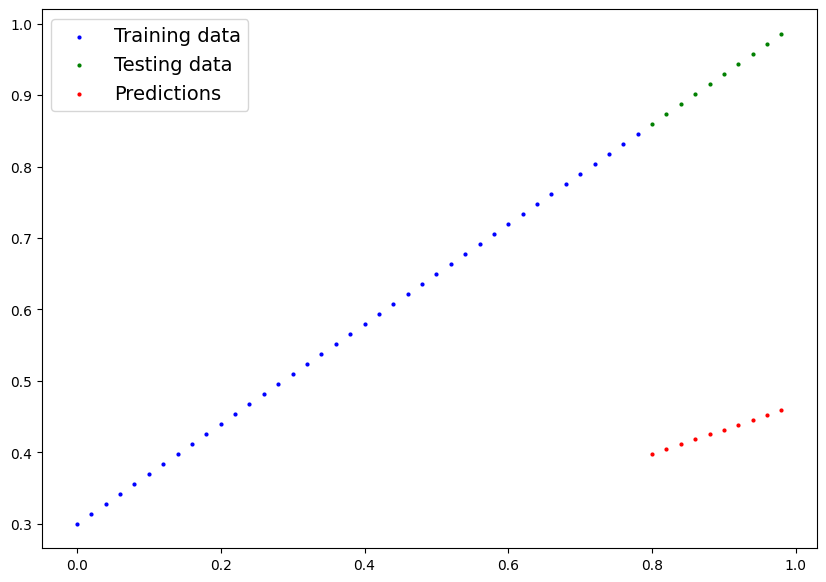

In [45]:
#plot again the first predictions
plot_predictions(predictions=y_preds);

In [46]:
import numpy as np
np.array(torch.tensor(train_loss_values).numpy())


array([0.31288138, 0.19767132, 0.08908726, 0.05314853, 0.04543797,
       0.04167863, 0.03818933, 0.0347609 , 0.03132383, 0.0278874 ],
      dtype=float32)

Text(0.5, 1.0, 'Training and test loss curves')

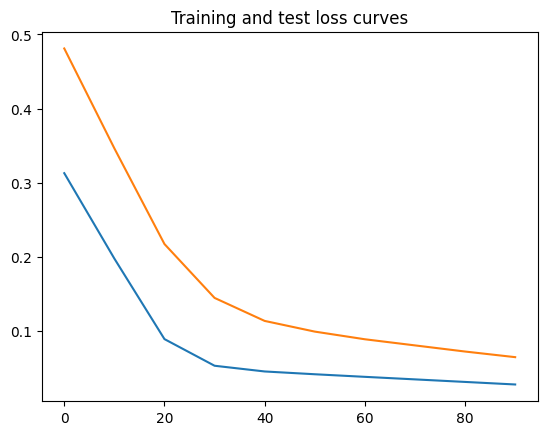

In [47]:
epoch_count, train_loss_values, test_loss_values
# Plot the loss curves
plt.plot(epoch_count, np.array(torch.tensor(train_loss_values).numpy()), label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")


In [48]:
#make new predictions and plot them
with torch.inference_mode():
  y_preds_new = model_0(X_test)


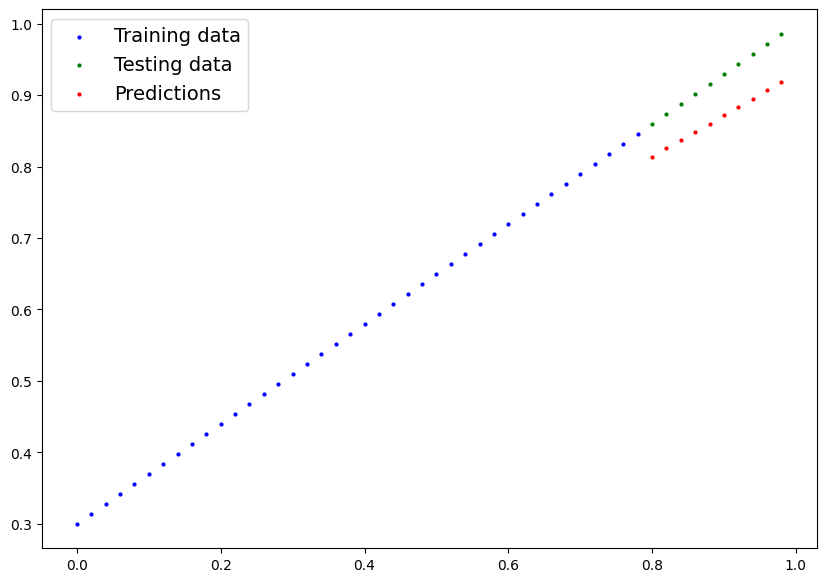

In [49]:
plot_predictions(predictions=y_preds_new);

### Saving a model in PyTorch
There are three main methods to know about for saving and loading models in PyTorch.
1. `torch.save()` - allows you to save a PyTorch object in Pythons pickle format
2. `torch.load()`- allows you to load a saved Pytorch object
3. `torch.nn.Module.load_state_dict()`- allows you to load a models saved state dictionary


In [50]:
# Saving our Pytorch model
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME= "01_pytorch_workflow_model_0_pth" # pytorch objects
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

MODEL_SAVE_PATH

# 3. Save the model state dict
print(f"Saving the model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)



Saving the model to: models/01_pytorch_workflow_model_0_pth


In [51]:
!ls -l models

total 8
-rw-r--r-- 1 root root 1704 Feb 26 13:34 01_pytorch_workflow_model_0_pth
-rw-r--r-- 1 root root 1744 Feb 26 13:33 01_pytorch_workflow_model_1.pth


# loading a model

Since we saved our models state_dict() instead of the entire model, we create a new instance of our model class and load the saved state_dict() into that


In [52]:
# To load in a pytorch model state dict we have to instantiate a new instance of our model class
loaded_model_0 = LinearRegressionModel()

# Load the saved state_dict of model_0 (this will update the new instance with updated parameters)

#torch.load()
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


<All keys matched successfully>

In [53]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.5784])), ('bias', tensor([0.3513]))])

In [54]:
# Make some prediction to make sure
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8141],
        [0.8256],
        [0.8372],
        [0.8488],
        [0.8603],
        [0.8719],
        [0.8835],
        [0.8950],
        [0.9066],
        [0.9182]])

In [55]:
# Make some models preds
model_0.eval()
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds


tensor([[0.8141],
        [0.8256],
        [0.8372],
        [0.8488],
        [0.8603],
        [0.8719],
        [0.8835],
        [0.8950],
        [0.9066],
        [0.9182]])

In [56]:
#Compare loaded model preds with original model preds
y_preds== loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

### 6. Puttiong it all together


In [57]:
# Import PyTorch and matplotlib
import torch
from torch import nn
import matplotlib.pyplot as plt

# check our pytorch version
torch.__version__

'2.1.0+cu121'

Create device-agnostic code
This means if we've got access to GPU, our code will use it (pot. faster comp)
If no GPU is availiable, the code will default to using CPU

In [58]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")



Using device: cuda


### 6.1 Data


In [59]:
# Create some linreg data (y=mx+c (or bx+a))

weight = 0.7
bias = 0.3

# Create range values
start = 0
end = 1
step = 0.02

# create X and y (feat and labels)
X = torch.arange(start, end, step).unsqueeze(dim=1)
y= weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [60]:
# Split data
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [61]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compare predictions
  """
  plt.figure(figsize=(10, 7))

  #Plot triang in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  #Are there predictions?
  if predictions is not None:
    # plot if exist
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  #Show the legend
  plt.legend(prop={"size": 14});

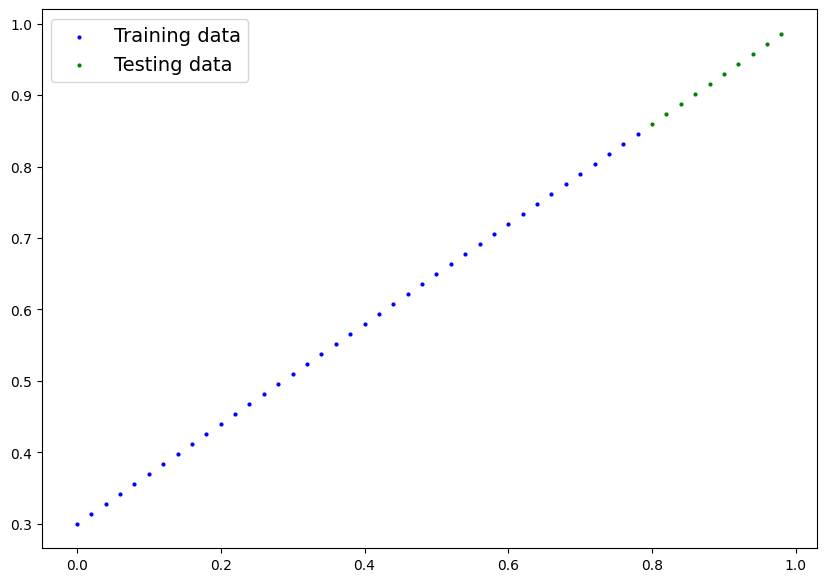

In [62]:
#plot data
plot_predictions(X_train, y_train, X_test, y_test)

### 6.2 Building a PyTorch Linear model

In [63]:
#Create a linear model by sobclassing nn:Module
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__() #this time using pytorch linear layer (/linear transform) instead of building this ourselves
    #nn.Linear() for creating the model parameters
    self.linear_layer = nn.Linear(in_features=1,
                                  out_features=1)

  def forward(self, x):
    return self.linear_layer(x)

# Set the manual seed
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()


(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [64]:
# Check the model current device
next(model_1.parameters()).device

device(type='cpu')

In [65]:
# Set the model to use the target device
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)



```
# This is formatted as code
```

### 6.3 Training
For treining we need:
* Loss function
* Optimizer
* Training loop
* Testing loop


In [66]:
# Setup loss function
loss_fn = nn.L1Loss() #Same as MAE
#setup our optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.01)


In [67]:
# Lets write a training loop
torch.manual_seed(42)
epochs= 200

#Data and model must both be on either CPU or GPU, device agnostic code for data:
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)


for epoch in range(epochs):
  model_1.train()

  # Forward pass
  y_pred = model_1(X_train)

  #2. Calc loss
  loss = loss_fn(y_pred, y_train)

  # Optimizer zero grad
  optimizer.zero_grad()

  #4. Backprop
  loss.backward()

  # 5. Optimizer step
  optimizer.step()

  ### Testing
  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)
    test_loss = loss_fn(test_pred, y_test)

  #Print whats happening

  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")



Epoch: 0 | Loss: 0.5551779866218567 | Test loss: 0.5739762187004089
Epoch: 10 | Loss: 0.439968079328537 | Test loss: 0.4392664134502411
Epoch: 20 | Loss: 0.3247582018375397 | Test loss: 0.30455657839775085
Epoch: 30 | Loss: 0.20954833924770355 | Test loss: 0.16984669864177704
Epoch: 40 | Loss: 0.09433845430612564 | Test loss: 0.03513690456748009
Epoch: 50 | Loss: 0.023886388167738914 | Test loss: 0.04784907028079033
Epoch: 60 | Loss: 0.019956795498728752 | Test loss: 0.045803118497133255
Epoch: 70 | Loss: 0.016517987474799156 | Test loss: 0.037530567497015
Epoch: 80 | Loss: 0.013089174404740334 | Test loss: 0.02994490973651409
Epoch: 90 | Loss: 0.009653178043663502 | Test loss: 0.02167237363755703
Epoch: 100 | Loss: 0.006215683650225401 | Test loss: 0.014086711220443249
Epoch: 110 | Loss: 0.00278724217787385 | Test loss: 0.005814164876937866
Epoch: 120 | Loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch: 130 | Loss: 0.0012645035749301314 | Test loss: 0.013801801018416

In [68]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

### 6.4 Making and evaluating predictions


In [69]:
# Turn model into evaluation mode
model_1.eval()

#make preds on the test data
with torch.inference_mode():
  y_preds = model_1(X_test)
y_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]], device='cuda:0')

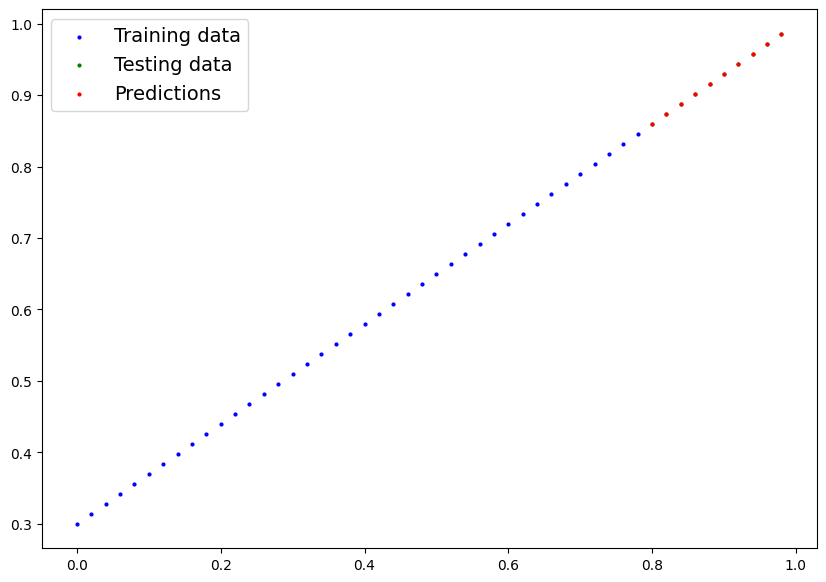

In [70]:
#Check it visually
plot_predictions(predictions=y_preds.cpu())

### 6.5 Saving and loading a trained model


In [71]:
from pathlib import Path
# 1. Create models dir
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

#2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
MODEL_SAVE_PATH

#3. Save the models state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(),
           f=MODEL_SAVE_PATH)


Saving model to: models/01_pytorch_workflow_model_1.pth


In [72]:
model_1.state_dict()


OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

In [73]:
# Load a pytorch model

#Create a new instance of lin reg model V2
loaded_model_1 = LinearRegressionModelV2()

# Load the saved model_1 state_dict
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

#Put the target model to device
loaded_model_1.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [74]:
next(loaded_model_1.parameters()).device

device(type='cuda', index=0)

In [75]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

In [78]:
# Evaluate the loaded model
loaded_model_1.eval()
with torch.inference_mode():
  loaded_model_1_preds = loaded_model_1(X_test)

y_preds == loaded_model_1_preds



tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')